In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# preparing features for training

def extract_code(s):
    s = s.split("/mini_")[-1]
    pdb_code = s.split("_")[0]
    lig_code = s.split("_chain")[1].split("_")[1]
    return (pdb_code + "_" + lig_code).upper()

actives = pd.read_csv("vscreenml_features_actives.csv")
actives["Class"] = 1

decoys = pd.read_csv("vscreenml_features_decoys_2.csv")
decoys["Class"] = 0

data = pd.concat([actives, decoys])
data = data[data["InteractionScore"] < 0]
data = data[data["VdwSA"] != "None"]

data["PDB_code"] = data["name"].apply(lambda x: extract_code(x))

discard_codes = data.groupby("PDB_code")["Class"].count().reset_index()
discard_codes = discard_codes[discard_codes["Class"] != 4]

data = data[~data["PDB_code"].isin(discard_codes["PDB_code"])]

data.to_csv("vscreenml_dudez.csv", index=False)

In [4]:
data = pd.read_csv("vscreenml_deepcoy.csv")
data

,name,TotalExposedSasa,TotalBSA,InterfaceHydrophobicSasa,InterfacePolarSasa,InteractionScore,FaAtrInteraction,FaRepInteraction,FaSolInteraction,FaElecInteraction,...,16.35,16.53,FCsp3,NumHAcceptors,NumHDonors,MolLogP,TPSA,VdwSA,Class,PDB_code
0,actives_best/mini_1a28_model0_chainB_STR_resi2...,-0.184006,701.40,0.846446,0.153554,-36.068202,-37.320399,12.820609,-1.920443,-2.179053,...,0,0,0.809524,2,0,4.72350,34.14,395.795291,1,1A28_STR
1,actives_best/mini_1a6v_model0_chainH_NPC_altA_...,-0.051948,594.80,0.636849,0.363151,-23.787337,-25.501940,4.720431,6.557934,-3.280293,...,0,0,0.428571,4,4,1.49550,126.94,380.675742,1,1A6V_NPC
2,actives_best/mini_1a9u_model0_chainA_SB2_resi8...,-0.021132,647.20,0.741420,0.258580,-30.784102,-30.858528,9.346084,3.316231,-4.277781,...,0,0,0.047619,3,1,4.68220,58.64,433.574413,1,1A9U_SB2
3,actives_best/mini_1afe_model0_chainH_ALZ_resi6...,-0.137664,796.50,0.567200,0.432800,-27.897997,-33.246864,5.727228,13.372526,-3.956453,...,0,0,0.529412,5,3,1.14730,96.69,452.601755,1,1AFE_ALZ
4,actives_best/mini_1aj7_model0_chainH_NPE_resi2...,-0.079367,589.80,0.733329,0.266671,-27.770962,-33.714508,10.640262,10.935087,-7.495546,...,0,0,0.363636,5,3,2.30530,124.14,338.284114,1,1AJ7_NPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,decoys_minimizations_2/mini_6eix_model0_chainA...,-0.216333,788.70,0.706117,0.293883,-30.208516,-30.567514,7.730429,2.842407,-5.132480,...,0,0,0.100000,5,0,3.60180,61.83,403.101472,0,6EIX_A3F
5264,decoys_minimizations_2/mini_6eix_model0_chainA...,-0.202679,776.80,0.693376,0.306624,-24.271484,-26.067421,3.275983,2.067862,-2.158146,...,0,0,0.294118,4,1,1.95750,71.78,386.438635,0,6EIX_A3F
5265,decoys_minimizations_2/mini_7gch_model0_chainG...,0.045857,451.72,0.606972,0.393028,-16.193236,-18.606933,4.235204,6.997072,-2.390915,...,0,0,0.411765,5,3,1.74230,96.89,404.420286,0,7GCH_LPF
5266,decoys_minimizations_2/mini_7gch_model0_chainG...,0.105405,430.73,0.644202,0.355798,-13.994867,-18.715591,2.948845,5.827002,-0.590915,...,0,0,0.142857,2,2,5.03632,69.24,407.785388,0,7GCH_LPF


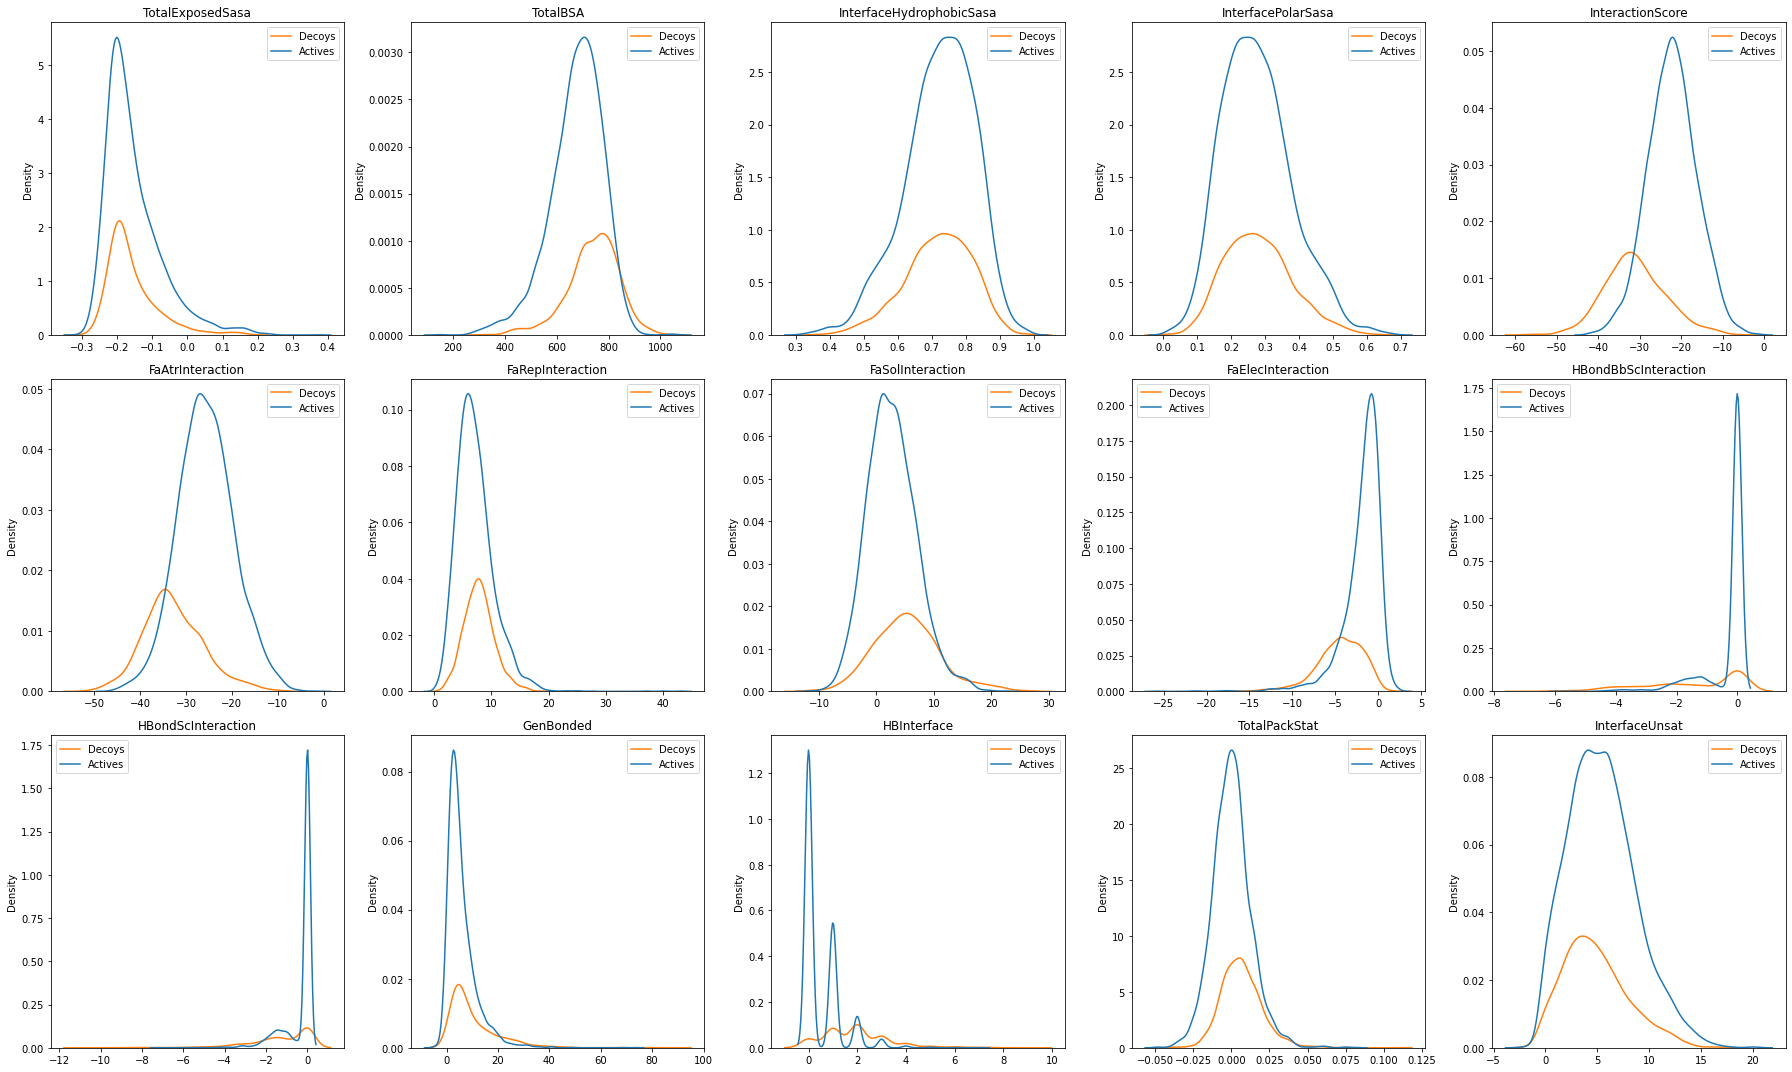

In [5]:
rosetta_features = data.columns[1:16]

fig, ax = plt.subplots(3,5, figsize=(25,15))

i,j = 0,0

for c in rosetta_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("Rosetta_FeaturesDistribution.png", dpi=100, facecolor="white")

/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


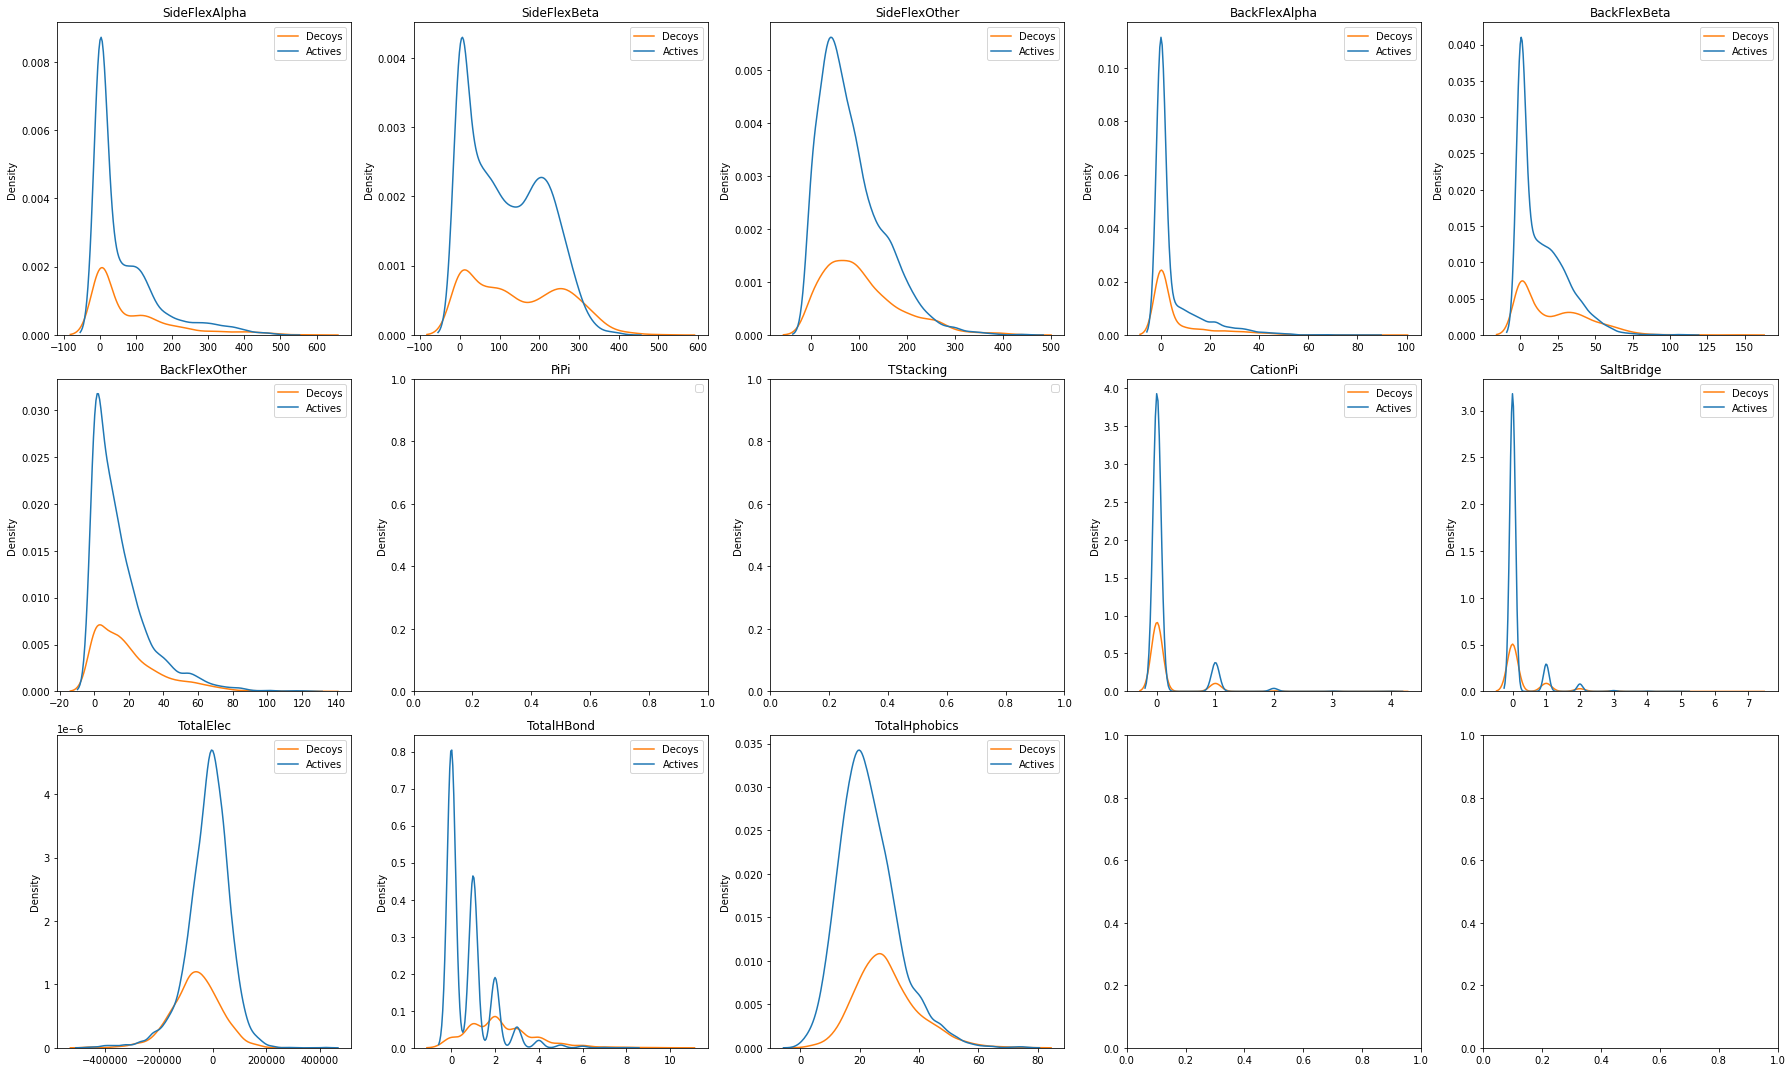

In [6]:
binana_features = data.columns[16:29]

fig, ax = plt.subplots(3,5, figsize=(25,15))

i,j = 0,0

for c in binana_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("Binana_FeaturesDistribution.png", dpi=100, facecolor="white")

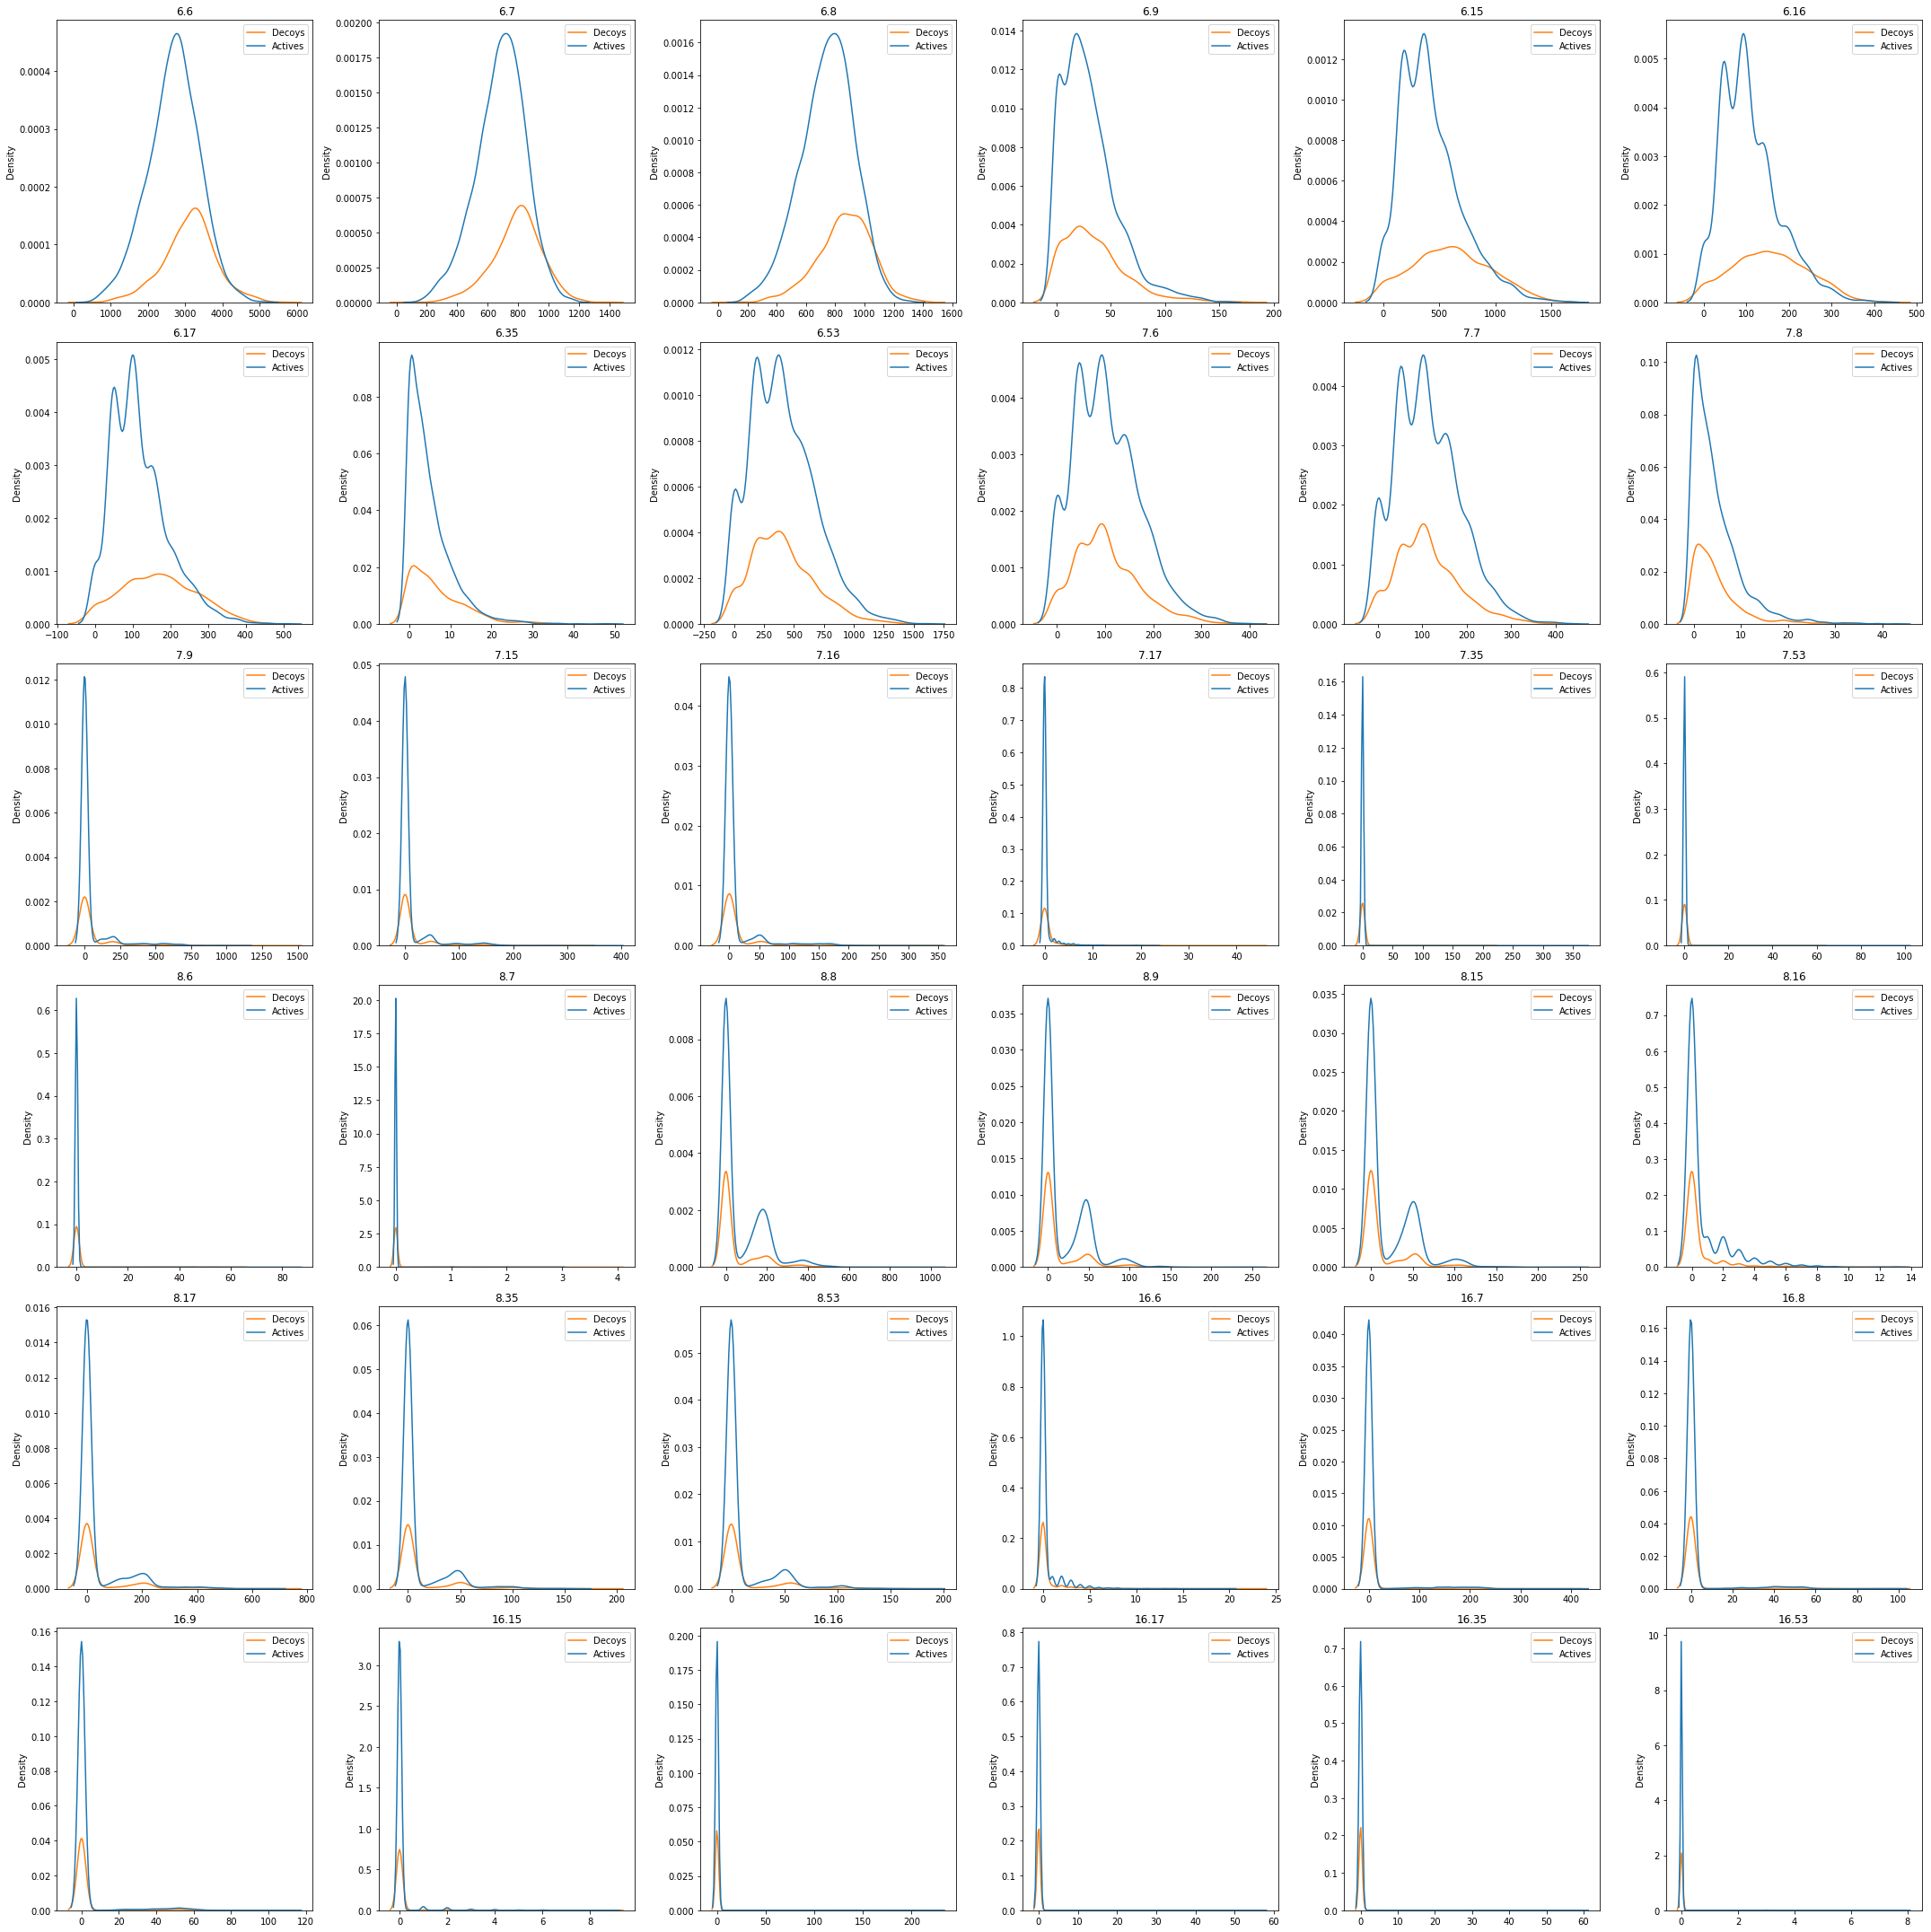

In [7]:
rf_features = data.columns[29:65]

fig, ax = plt.subplots(6,6, figsize=(30,30))

i,j = 0,0

for c in rf_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("RF_FeaturesDistribution.png", dpi=100, facecolor="white")

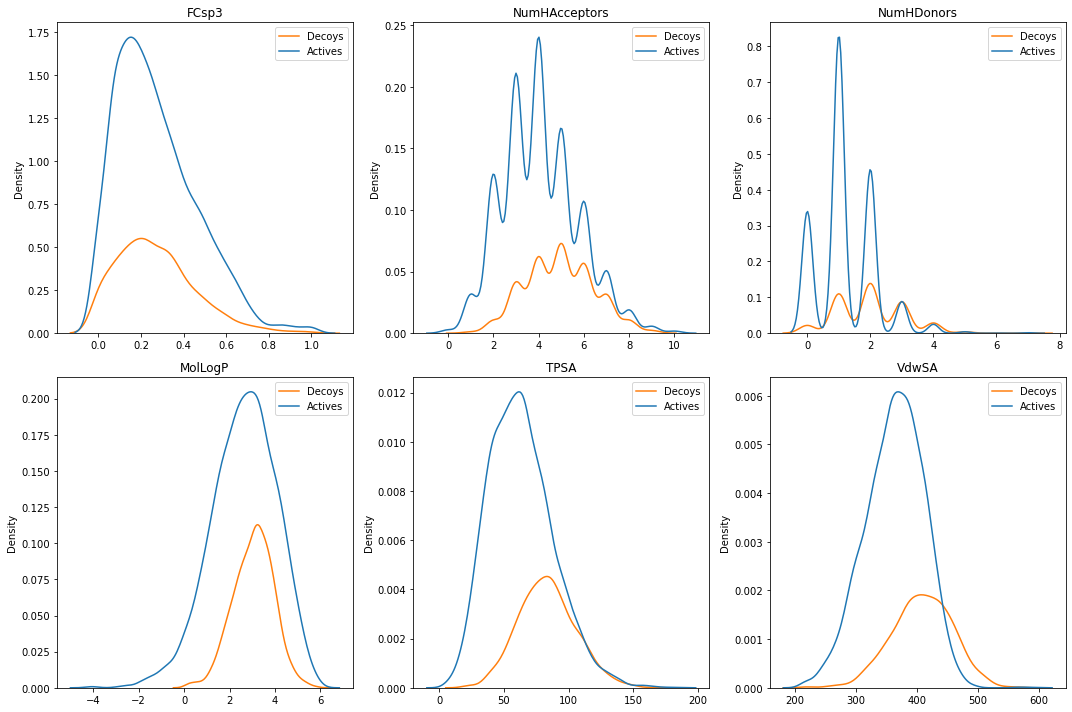

In [8]:
rdkit_features = data.columns[65:-2]
fig, ax = plt.subplots(2,3, figsize=(15,10))

i,j = 0,0

for c in rdkit_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("RDKit_FeaturesDistribution.png", dpi=100, facecolor="white")

In [9]:
import os, time, glob

for col in data.columns[1:-2]:
    
    os.system(f"rm -rf {col}; mkdir -p {col}")

    borders = data[data["Class"] == 1].groupby("Class")[col].agg(["idxmin","idxmax"]).to_dict()
    borders = [vv for v in borders.values() for vv in v.values()]

    for c in data.iloc[borders, :]["name"]:
        os.system(f"scp -r $fccc_host:~/2/{c} ./{col}")
        
    if len(glob.glob(f"{col}/*pdb")) != 2:
        time.sleep(30)
        for c in data.iloc[borders, :]["name"]:
            os.system(f"scp -r $fccc_host:~/2/{c} ./{col}")
        

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/wj/rf0rfd0n7qs_kcy6mjxq_kpsk71r31/T/ipykernel_30766/3980210201.py", line 14, in <module>
    time.sleep(30)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, 

TypeError: object of type 'NoneType' has no len()